# End-to-End Data Pipeline Project using Pandas


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from requests.exceptions import ConnectionError, Timeout, HTTPError, RequestException

# pd.set_option('display.max_rows', None)


In [2]:
url = "https://www.theguardian.com/sport/datablog/2012/jun/25/olympic-medal-winner-list-data#data"

In [3]:
# Fetching the data from website

with requests.Session() as session:
    try:
        response = session.get(url, timeout=10)
        response.raise_for_status()
        df = pd.read_html(response.content)[0]

        print("Data fetched sucessfully")

    except (ConnectionError):
        print(f"Failed to connect to server")

    except (Timeout):
        print(f"Request timed out")

    except (HTTPError):
        print(f"HTTP error occurred, page not found")


Data fetched sucessfully


**Explanation of code:**

Line 8: `with requests.Session() as session`:

This line starts a session using the requests library. Sessions are helpful for making multiple requests to the same website efficiently.

Line 9: `try:`

This begins a try-except block, which is used for error handling. The code within the try block will be executed, and if any errors occur, the corresponding except block will handle them.

Line 10: `response = session.get(url, timeout=10)`

This line uses the session to send a GET request to the specified URL to retrieve data. timeout=10 sets a timeout of 10 seconds, meaning the request will fail if it takes longer than that.

***How do I know if the first table is the one I am looking for?***

1. Inspecting the HTML Source:

  The most reliable way is to inspect the HTML source code of the webpage you're scraping.
  You can do this in your web browser by right-clicking on the page and selecting "View Page Source" or a similar option.
  Look for the "<'table>" elements in the HTML. The first "<'table>" tag usually corresponds to the first table that pd.read_html will find.
  Examine the table's structure (rows, columns, headers) within the HTML to confirm if it contains the data you need.

2. Trial and Error:

  If inspecting the HTML is not convenient, you can use trial and error.
  Start by assuming the first table ([0]) is the correct one.
  After running pd.read_html, print the DataFrame's head (first few rows) using df.head().
  If the output matches the data you expect, then you've selected the right table.
  If not, try accessing other tables by changing the index (e.g., [1], [2]) until you find the one with the desired data.

3. Developer Tools (Browser):

  Modern web browsers have developer tools that can help you inspect elements on a page.
  You can use these tools to identify the specific HTML table element that contains your data and its index.
  In the context of the Guardian Olympic Medals webpage:

  Based on the structure of the webpage, it's very likely that the first table ([0]) contains the primary medal data. This is a common pattern on data-heavy webpages.
  However, it's always a good practice to confirm using one of the above methods, especially if you're working with a new or unfamiliar website. *italicized text*



Line 11: `response.raise_for_status()`

This checks if the request was successful (status code 200). If the request failed (e.g., 404 Not Found), it will raise an HTTPError exception.

Line 12: `df = pd.read_html(response.content)[0]`

This extracts the first HTML table from the response content using Pandas' read_html function, as discussed previously.

Line 14: `print("Data fetched successfully")`

If the code reaches this point without errors, it means the data was fetched successfully.

Lines 16-20: `except ...`

These lines define different except blocks to handle specific types of errors.

In [4]:
df.tail()

,Athlete,Country,Bronze,Silver,Gold,Grand Total
297,"YANG, Wei",China,NaN,2,3,5
298,"ZAMPORI, Giorgio",Italy,1,NaN,4,5
299,"ZATOPEK, Emil",Czechoslovakia,NaN,1,4,5
300,"ZUCHOLD, Erika",East Germany,1,4,NaN,5
301,SOURCE: IOC,SOURCE: IOC,SOURCE: IOC,SOURCE: IOC,SOURCE: IOC,SOURCE: IOC


# Data Cleaning

In [5]:
# The last row (index 301) of df is not relevant

df.tail()

,Athlete,Country,Bronze,Silver,Gold,Grand Total
297,"YANG, Wei",China,NaN,2,3,5
298,"ZAMPORI, Giorgio",Italy,1,NaN,4,5
299,"ZATOPEK, Emil",Czechoslovakia,NaN,1,4,5
300,"ZUCHOLD, Erika",East Germany,1,4,NaN,5
301,SOURCE: IOC,SOURCE: IOC,SOURCE: IOC,SOURCE: IOC,SOURCE: IOC,SOURCE: IOC


In [6]:
df = df.iloc[:-1]

In [7]:
df.tail()

,Athlete,Country,Bronze,Silver,Gold,Grand Total
296,"XIONG, Ni",China,1,1,3,5
297,"YANG, Wei",China,NaN,2,3,5
298,"ZAMPORI, Giorgio",Italy,1,NaN,4,5
299,"ZATOPEK, Emil",Czechoslovakia,NaN,1,4,5
300,"ZUCHOLD, Erika",East Germany,1,4,NaN,5


In [8]:
# Analizing missing values

df.count()

,0
Athlete,301
Country,301
Bronze,232
Silver,262
Gold,283
Grand Total,301


In [9]:
# Replacing missing values with zero

df.fillna(0, inplace=True)

df.count()

<ipython-input-9-162a69e1d26d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)


,0
Athlete,301
Country,301
Bronze,301
Silver,301
Gold,301
Grand Total,301


**More data tranformation using functions**

In [10]:
# Testing alternatives to tranform the 'Athlete' column

a = "VON HOLST, Johan Hübner"

# First alterantive to transform the name

temp = a.casefold().replace(", "," ").title().split(" ")
print(temp)

temp.reverse()

print(temp)


f_name = temp[0]
l_name = temp[1]

res_name = f_name + " " + l_name
print(res_name)

# Second alternative to transform the name

rev = list(reversed(a.title().split(", ")))
print(rev)

res_name = rev[0] + " " + rev[1]
print(res_name)



['Von', 'Holst', 'Johan', 'Hübner']
['Hübner', 'Johan', 'Holst', 'Von']
Hübner Johan
['Johan Hübner', 'Von Holst']
Johan Hübner Von Holst


In [11]:
def transform_name(x):
    """
    Reverse the name of the Athlete column
    """
    x = list(reversed(x.title().split(", ")))
    return x[0] + " " + x[1]

df['Athlete'] = df['Athlete'].apply(transform_name)

<ipython-input-11-7fd03f8c819a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Athlete'] = df['Athlete'].apply(transform_name)


In [12]:
df

,Athlete,Country,Bronze,Silver,Gold,Grand Total
0,Larisa Latynina,Soviet Union,4,5,9,18
1,Michael Phelps,United States,2,0,14,16
2,Nikolay Andrianov,Soviet Union,3,5,7,15
3,Edoardo Mangiarotti,Italy,2,5,6,13
4,Takashi Ono,Japan,4,4,5,13
...,...,...,...,...,...,...
296,Ni Xiong,China,1,1,3,5
297,Wei Yang,China,0,2,3,5
298,Giorgio Zampori,Italy,1,0,4,5
299,Emil Zatopek,Czechoslovakia,0,1,4,5


# Creating functions to implement a tranformation pipeline

In [13]:
# Extract data from website

def extract(df, url):
    with requests.Session() as session:
      try:
          response = session.get(url, timeout=10)
          response.raise_for_status()
          # df1 = pd.read_html(response.content)[0]
          df = pd.read_html(response.content)[0]

          print("Data fetched sucessfully")
          return df

      except (ConnectionError):
          print(f"Failed to connect to server")

      except (Timeout):
          print(f"Request timed out")

      except (HTTPError):
          print(f"HTTP error occurred, page not found")

In [14]:
# Transform data

def remove_last_row(df):
    df = df.iloc[:-1]   # df = df.drop([301]) is another alternative but it's hardcoded
    return df

def fill_missing_values(df):
    df = df.fillna(0)
    return df

def update_athlete_name(df):
    """
    Reverse the name of the Athlete column
    """
    df['Athlete'] = df['Athlete'].apply(transform_name)
    return df

def rename_columns(df):
    df = df.rename(columns= {'Grand Total':'Total Medals'})
    return df

In [15]:
# Load data
"""
This function is designed to save a Pandas DataFrame (df) to a CSV (Comma-Separated Values) file. This is
typically the final step in a data pipeline, where you want to store the processed data for later use or
analysis.
"""

def load(df, output_file):
    df.to_csv(output_file, index=False)


How it Works:

`def load(df, output_file)`: This line defines the function named load and takes two arguments:

df: The Pandas DataFrame containing the data you want to save.
output_file: The name (and path, if needed) of the file where you want to save the data. This should be a string (e.g., 'output.csv').

`df.to_csv(output_file, index=False)`: This is the core of the function. It uses the to_csv method of the DataFrame to save it as a CSV file.

`output_file`: This is the file name you provided as an argument.

`index=False`: This is an important parameter. Setting it to False tells Pandas not to include the DataFrame's index (the row numbers) in the output CSV file. This is often preferred to keep the data clean and focused on the actual content.

# Creating the actual pipeline

In [16]:
df = (pd.DataFrame().
      pipe(extract, url).
      pipe(remove_last_row).
      pipe(fill_missing_values).
      pipe(update_athlete_name).
      pipe(rename_columns).
      pipe(load, r"C:\Documents\Samy\Personal Development\Online_Courses\Machine Learning\medals.csv"))

Data fetched sucessfully


In [17]:
df_new = pd.read_csv(r"C:\Documents\Samy\Personal Development\Online_Courses\Machine Learning\medals.csv")

In [18]:
df_new.tail()

,Athlete,Country,Bronze,Silver,Gold,Total Medals
296,Ni Xiong,China,1,1,3,5
297,Wei Yang,China,0,2,3,5
298,Giorgio Zampori,Italy,1,0,4,5
299,Emil Zatopek,Czechoslovakia,0,1,4,5
300,Erika Zuchold,East Germany,1,4,0,5


In [19]:
medals_country = df_new.groupby('Country')['Total Medals'].sum().sort_values(ascending=False)

print(medals_country)

Country
United States              387
Soviet Union               213
East Germany               110
Italy                      108
Hungary                    108
Japan                       99
Australia                   88
Romania                     86
France                      80
Sweden                      78
Germany                     68
China                       59
Finland                     49
Unified team                43
Norway                      43
Switzerland                 43
Netherlands                 39
Unified team of Germany     31
United Kingdom              27
Russia                      24
Czechoslovakia              21
Belgium                     20
West Germany                16
New Zealand                 15
Jamaica                     14
Poland                      12
Yugoslavia                  11
Denmark                     10
Cuba                        10
Zimbabwe                     7
Korea, South                 6
Ukraine                      5


Explanation:

`df_new.groupby('Country')`:

`df_new`: This is the Pandas DataFrame you want to group.
`.groupby('Country')`: This is the core of the groupby operation. It groups the rows of the DataFrame based on the values in the 'Country' column. This creates a GroupBy object.

Think of it like this: Imagine sorting a deck of cards by suit. groupby is like separating the cards into four piles (hearts, diamonds, clubs, spades). Each pile represents a group.

`['Grand Total']`

This is formatted as code:

This part selects a specific column ('Grand Total' in this case) from each group.
It's applied to the GroupBy object created in the previous step.
Continuing with the card analogy: This is like selecting only the face cards (Jacks, Queens, Kings) from each of the four piles.

`.count()`:

This is an aggregation function that operates on the selected column ('Grand Total'). It counts the number of non-missing values in that column within each group.
Back to the cards: This is like counting how many face cards are in each of the four piles.

Putting it all together:

The entire line `medals_country = df_new.groupby('Country')['Grand Total'].count()` does the following:

Groups: Divides the DataFrame df_new into groups based on the 'Country' column.
Selects: Selects the 'Grand Total' column from each group.

Aggregates: Counts the number of non-missing values in the 'Grand Total' column within each group (country).
Assigns: Assigns the resulting Series (country names as index, counts as values) to the variable medals_country.

In [20]:
medals_country.info()

<class 'pandas.core.series.Series'>
Index: 35 entries, United States to Brazil
Series name: Total Medals
Non-Null Count  Dtype
--------------  -----
35 non-null     int64
dtypes: int64(1)
memory usage: 560.0+ bytes


<Axes: title={'center': 'Total Olympic Medals by Country'}, xlabel='Country', ylabel='Total Medals'>

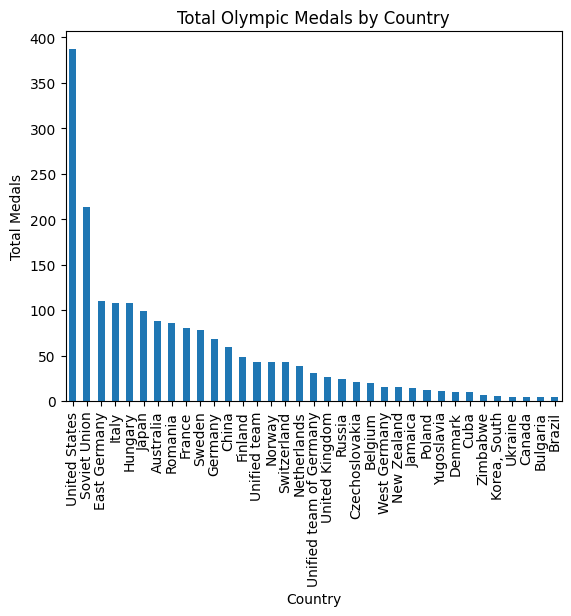

In [21]:
# Plotting

medals_country.plot(kind='bar', xlabel='Country', ylabel='Total Medals', title='Total Olympic Medals by Country')


In [22]:
medals_by_country = df_new.groupby('Country')[['Gold', 'Silver', 'Bronze']].sum().sort_values(by=['Gold'], ascending=False).reset_index()

print(medals_by_country)

                    Country  Gold  Silver  Bronze
0             United States   228      93      66
1              Soviet Union    92      77      44
2                   Hungary    56      29      23
3              East Germany    51      36      23
4                     Italy    50      34      24
5                   Romania    47      21      18
6                     Japan    43      32      24
7                 Australia    37      33      18
8                     China    33      19       7
9                    France    31      27      22
10                  Germany    29      17      22
11                   Sweden    27      27      24
12                  Finland    26      10      13
13                   Norway    21      15       7
14             Unified team    19      12      12
15           United Kingdom    18       4       5
16              Netherlands    18      11      10
17  Unified team of Germany    16       7       8
18           Czechoslovakia    12       7       2


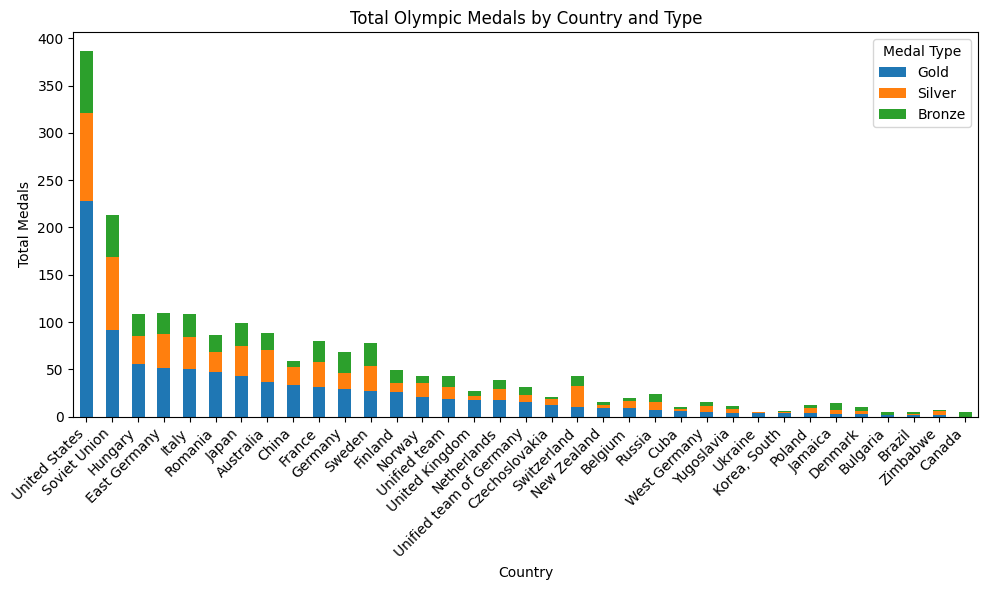

In [23]:
# 2. Create the stacked bar chart
medals_by_country.plot(kind='bar', stacked=True, x='Country',y=['Gold', 'Silver', 'Bronze'], figsize=(10, 6))
plt.title('Total Olympic Medals by Country and Type')
plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.legend(title='Medal Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()